# PROBLEM STATEMENT

In this notebook we will say a Bayesian Approach for ranking 
Lets say we have a site publishing news article
We want to rank the news article based on CTR.(Click through rate) and make them appear in the news feed based on the rank
But initially we do not have any CTR for new article.
We want to balance exploration vs exploit.

In [ ]:
# Lets say we have 3 News article. One is awesome, one is ok and one is bad. There actual CTR rate are 0.7 , 0.5 and 0.2 . Though we don't know those. LEt us device an experiment how our news feed line will rank them.

In [ ]:
# We will use bayes formula to formulate a posterior distribution.
# We will using that our prior distribution is uniform to start with
# We will start clicking our posterior distribution once CTR starts accumulating.

In [1]:
# Intalling libraries
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import beta

In [11]:

num_trials = 2000
news_ctr = [0.2, 0.5, 0.75] # This we dont know 

class News:
    def __init__(self,p):
        self.p = p # actual click through rate for drawing samples 
        self.a = 1 # initially we will use uniform distribution
        self.b = 1 # # initially we will use uniform distribution
        self.N = 0
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a,self.b)
    
    def update(self,x):
        self.a += x
        self.b += 1 - x
        self.N += 1

def plot(news_article, trial):
  x = np.linspace(0, 1, 200)
  for news in news_article:
    y = beta.pdf(x, news.a, news.b)
    plt.plot(x, y, label= f"real p: {news.p:.4f}")
  plt.title(f"News article  distributions after {trial} trials")
  plt.legend()
  plt.show()

def experiment():
    news_article = [News(p) for  p in news_ctr]
    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for j in range(num_trials):

        max_news_ranking = np.argmax([news.sample() for news in news_article])

        x=     news_article[max_news_ranking].pull() # check for CTR

        news_article[max_news_ranking].update(x) # Update posterior distribution
        if j in sample_points:
            plot(news_article, j)


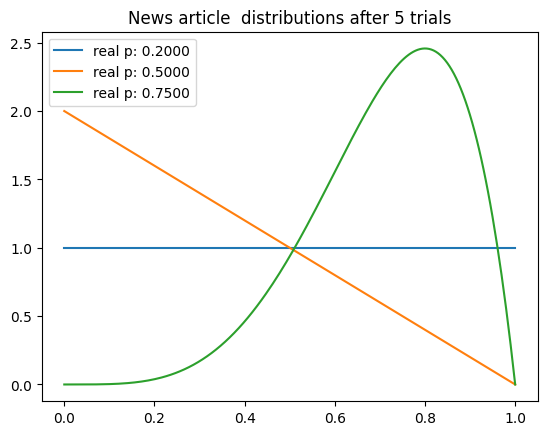

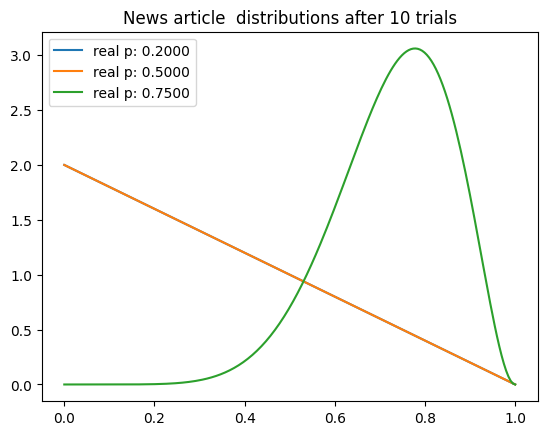

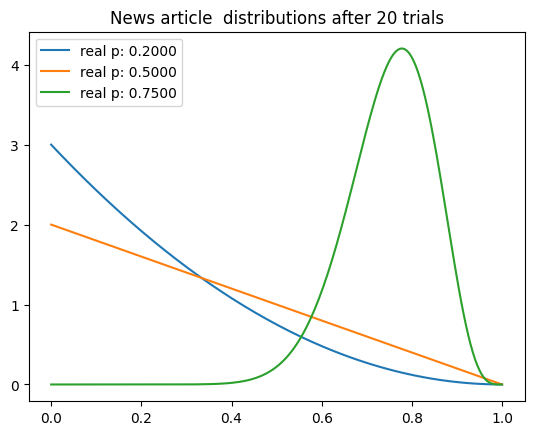

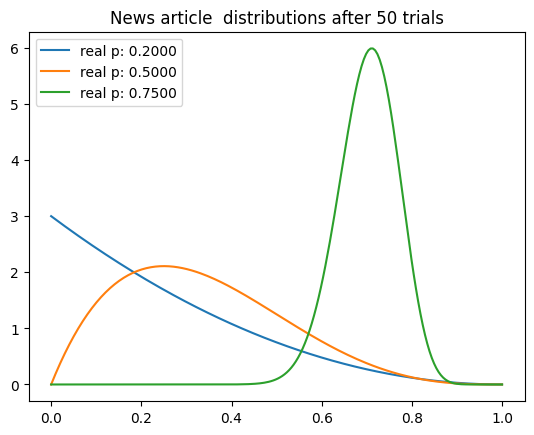

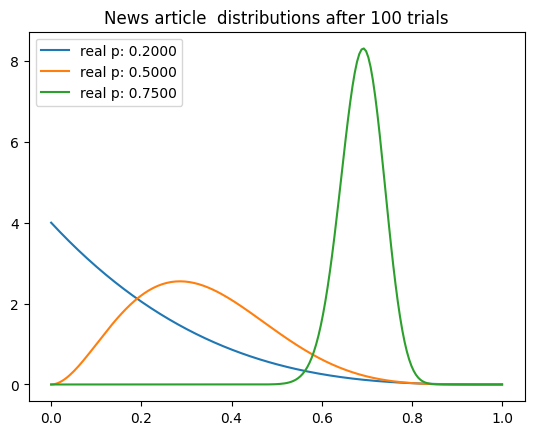

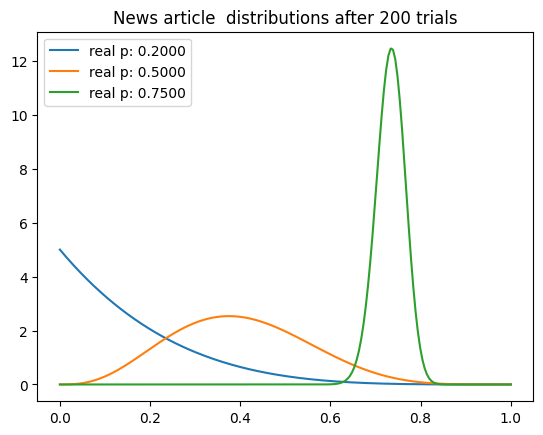

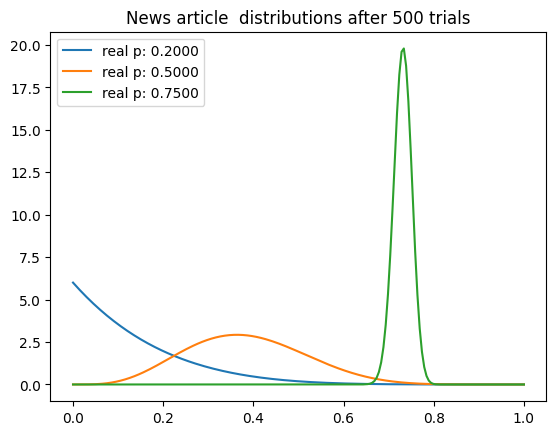

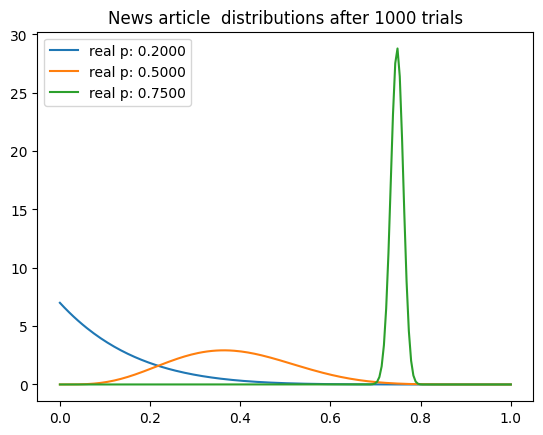

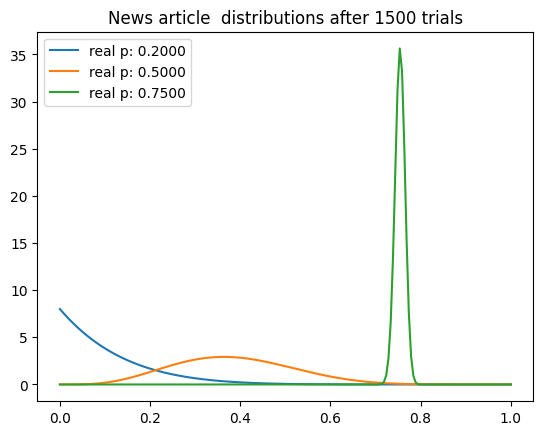

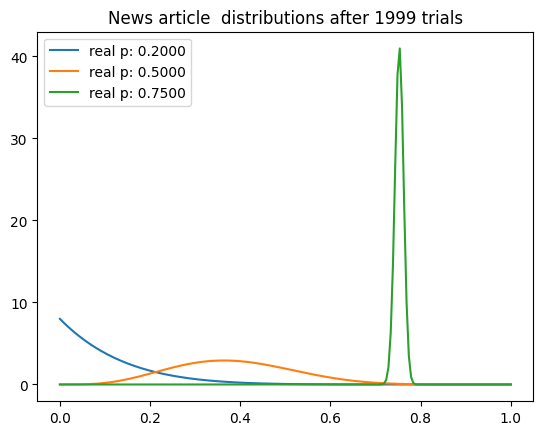

In [12]:
experiment()